# Specificity

In [1]:
import pandas as pd
from katlas.core import *

In [2]:
pssms= pd.read_parquet('out/CDDM_pssms.parquet')

In [3]:
spec = pssms.apply(get_specificity_flat , axis=1)

In [4]:
%%time
df=Data.get_ks_dataset()

CPU times: user 759 ms, sys: 409 ms, total: 1.17 s
Wall time: 4min 45s


In [5]:
df['kinase_id'] = df['kinase_uniprot'] + '_' + df['kinase_genes'].str.split().str[0]

In [6]:
info = df[['kinase_id','kinase_group']].drop_duplicates()

In [7]:
info['specificity'] = info.kinase_id.map(spec)

In [8]:
info.isna().sum()

kinase_id         0
kinase_group     30
specificity     120
dtype: int64

There are 30 kinase without assigning a kinase group

In [9]:
info = info.dropna()

In [10]:
info = info.sort_values('specificity',ascending=False)

In [11]:
from katlas.plot import *

In [15]:
set_sns()

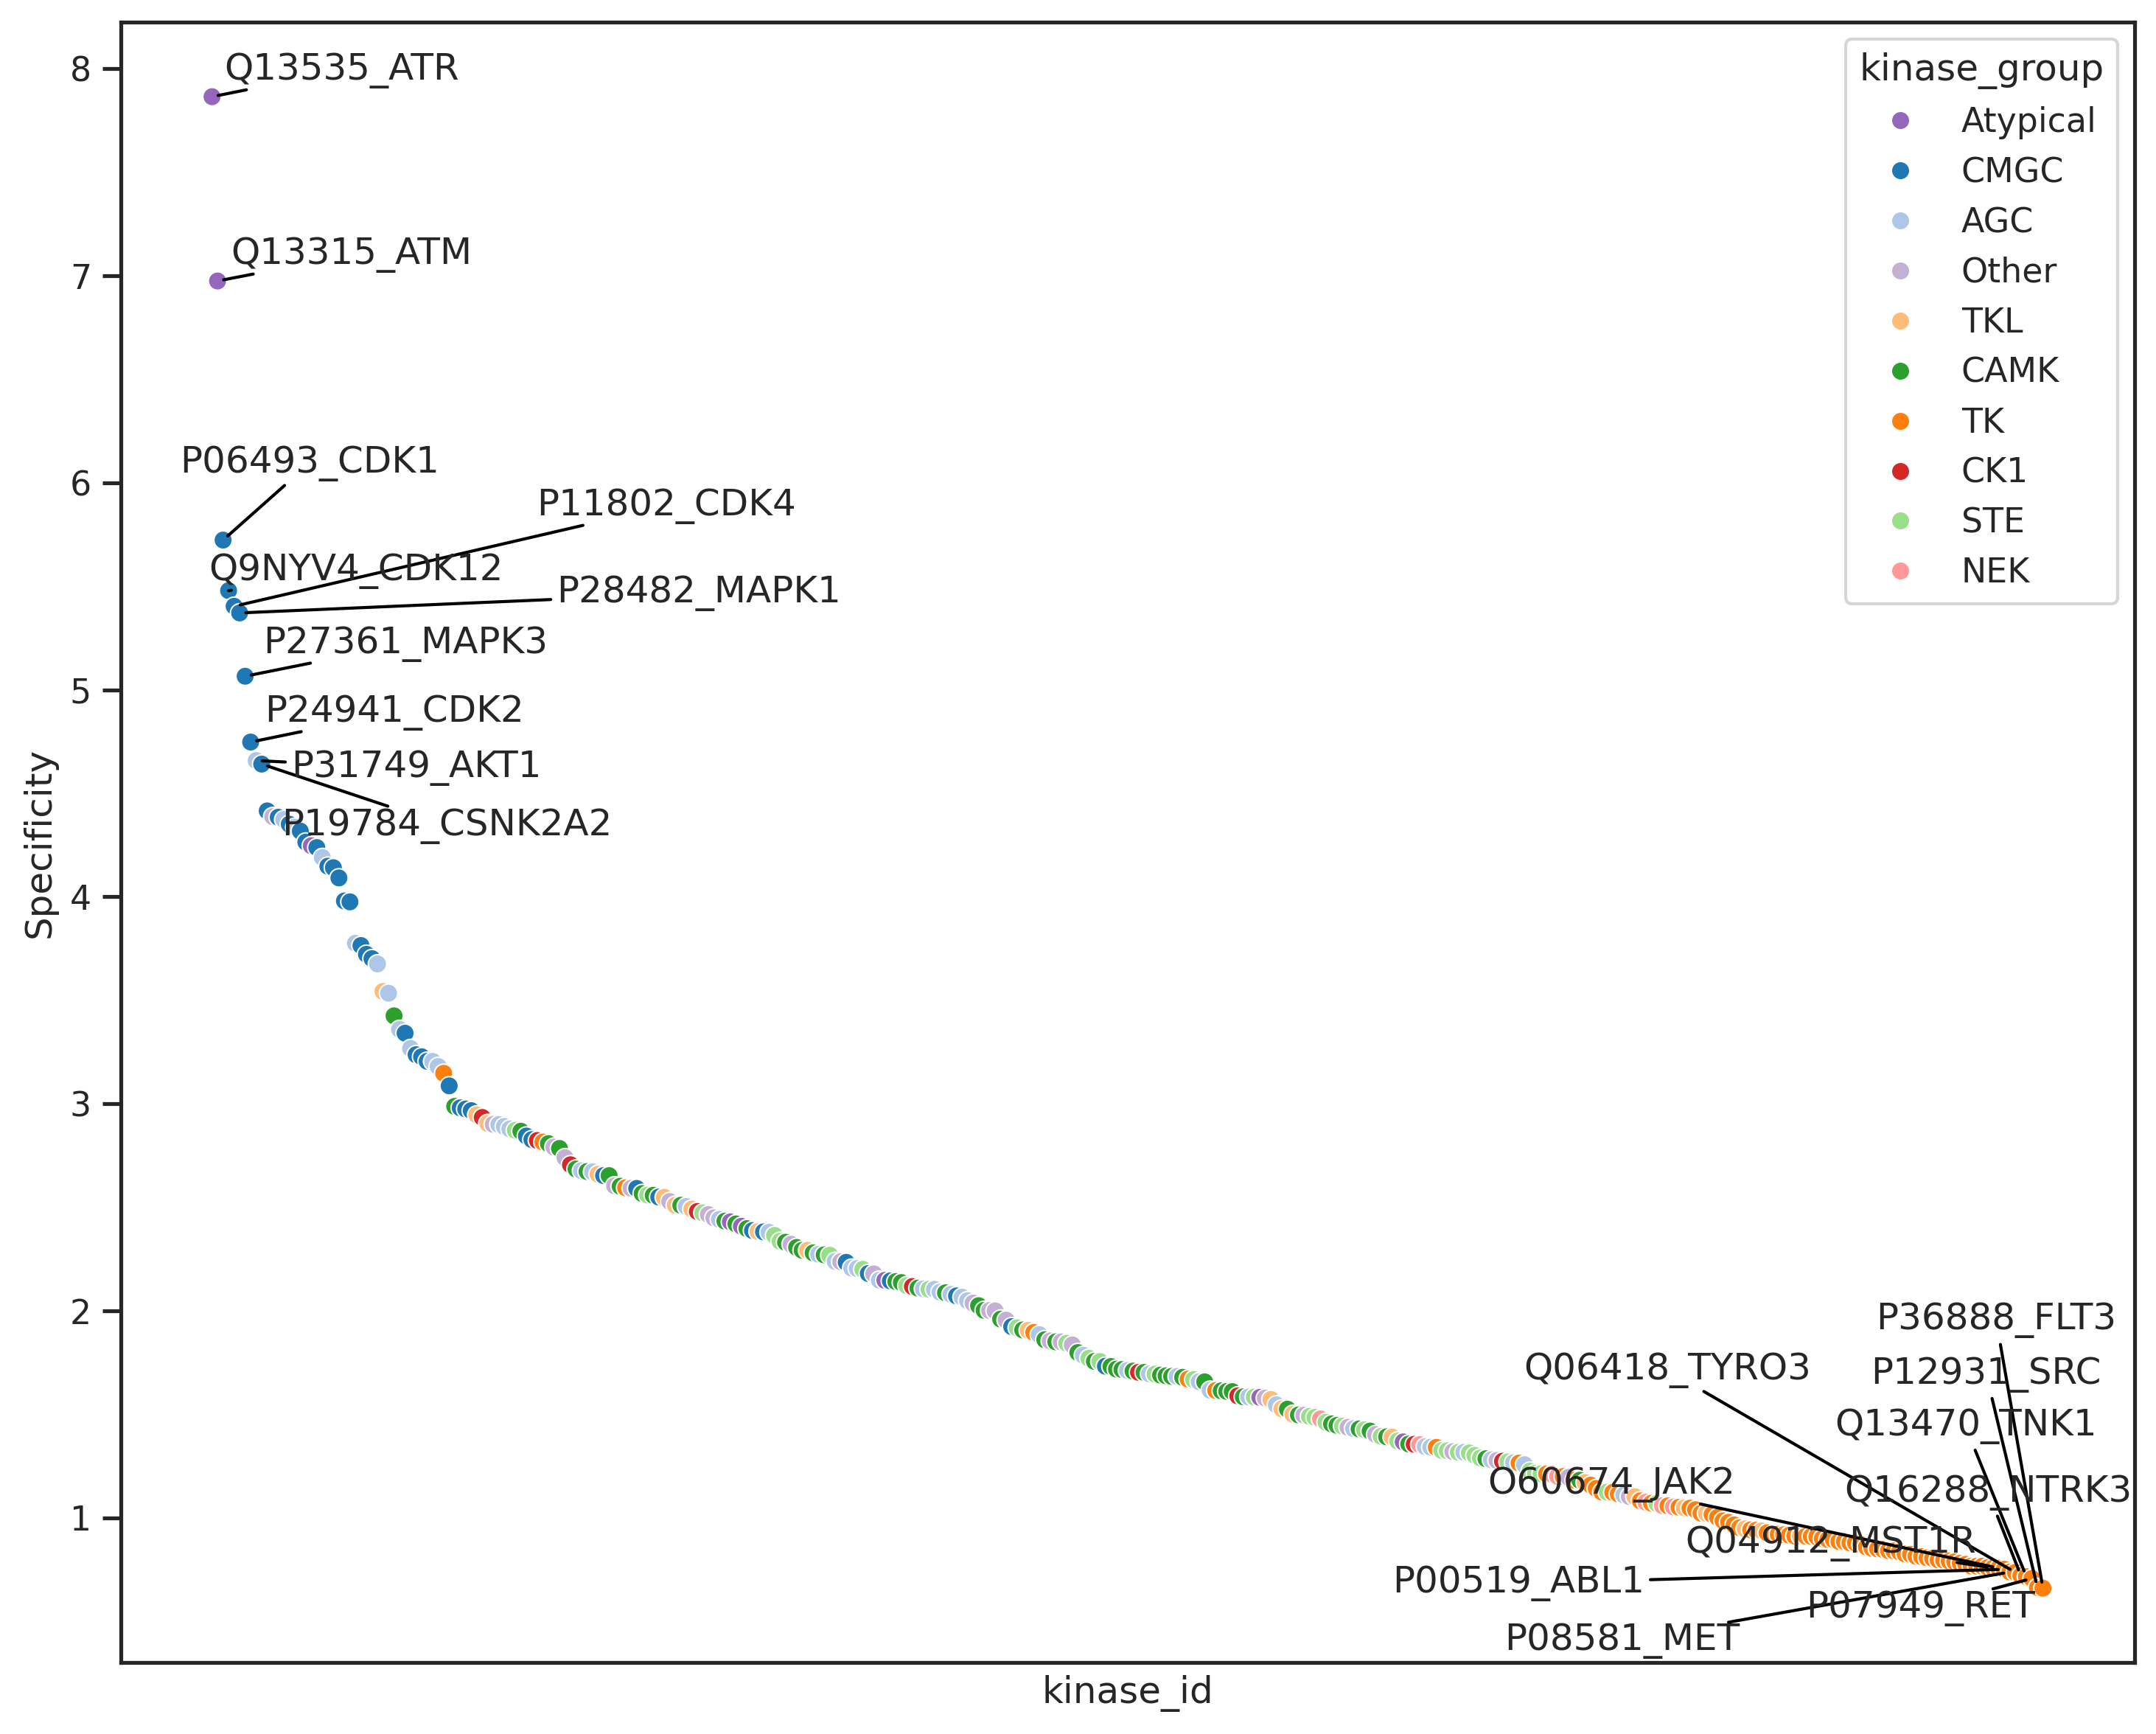

In [16]:
plot_rank(info,x='kinase_id',y='specificity',hue='kinase_group',palette=group_color)

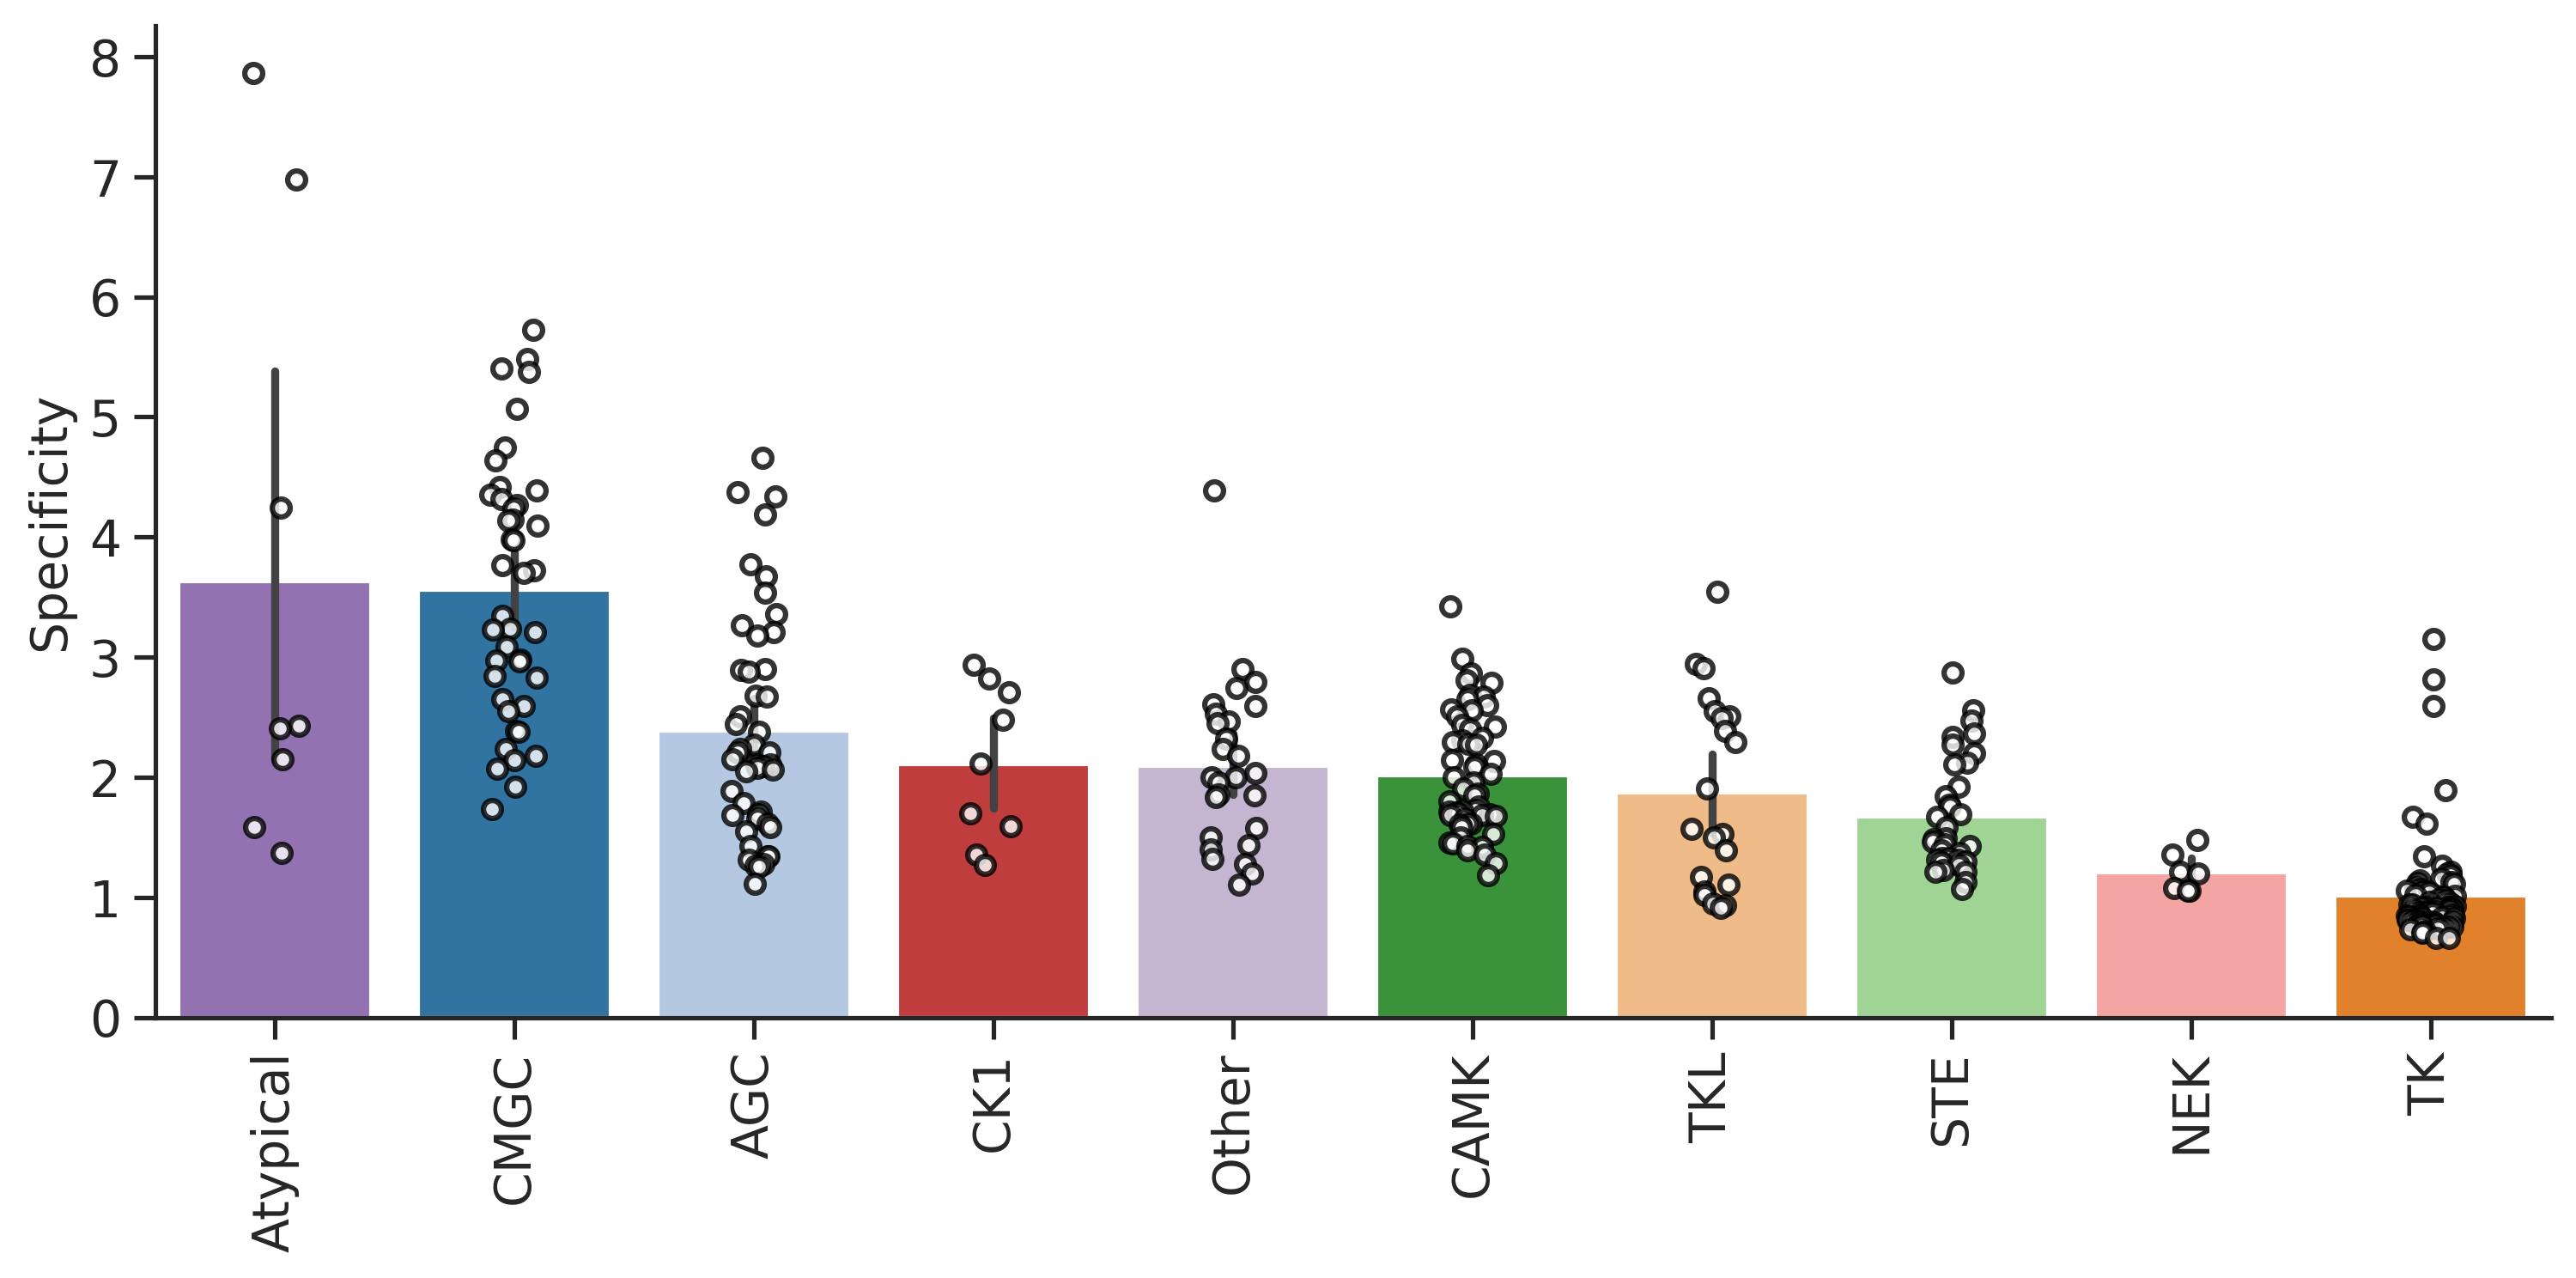

In [17]:
plot_bar(info,value='specificity',group='kinase_group',palette=group_color)